In [ ]:
#12 Recognize optical character using ANN.
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
X_train=x_train.reshape(60000,784)
print("x-train")
print(X_train)
X_test=x_test.reshape(10000,784)
print("x-test")
print(X_test)

x-train
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
x-test
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train=to_categorical(y_train,num_classes=10)
y_test=to_categorical(y_test,num_classes=10)

In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model=Sequential()
model.add(Dense(50,activation='relu',input_shape=(784,)))
model.add(Dense(50,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                39250     
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
Total params: 42310 (165.27 KB)
Trainable params: 42310 (165.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,batch_size=64,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3326 - accuracy: 0.9051 - val_loss: 0.1704 - val_accuracy: 0.9496
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1570 - accuracy: 0.9536 - val_loss: 0.1392 - val_accuracy: 0.9557
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1189 - accuracy: 0.9646 - val_loss: 0.1155 - val_accuracy: 0.9656
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0956 - accuracy: 0.9711 - val_loss: 0.1070 - val_accuracy: 0.9689
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0803 - accuracy: 0.9764 - val_loss: 0.1065 - val_accuracy: 0.9694
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0703 - accuracy: 0.9790 - val_loss: 0.0939 - val_accuracy: 0.9728
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0616 - accuracy: 0.9815 - val_loss: 0.0972 - val_accuracy: 0.9709
Epoch 

In [ ]:
import numpy as np

In [ ]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y_train[:5,:]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
img0 = np.array(X_train[0]).reshape(1,784)

In [ ]:
model.predict(img0).argmax()

1/1 [==============================] - 0s 61ms/step


5

In [ ]:
y_train[0].argmax()

5

In [ ]:
def recognise(img):
  img=np.array(img).reshape(1,784)
  return model.predict(img).argmax()

In [ ]:
y_pre=model.predict(X_test).argmax(axis=1)

313/313 [==============================] - 0s 1ms/step


In [ ]:
y_pre

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
len(y_pre)

10000

In [ ]:
y_test.argmax(axis=1)

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
sum(y_pre==y_test.argmax(axis=1))

9712

In [ ]:
9737/10000

0.9737

In [ ]:
import matplotlib.pyplot as plt

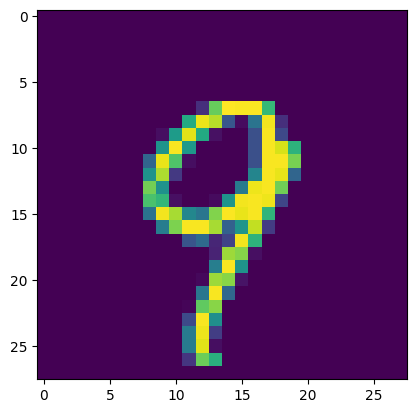

In [ ]:
plt.imshow(np.array(X_test[560]).reshape(28,28))

In [ ]:
recognise(X_test[560])

1/1 [==============================] - 0s 13ms/step


9